## Данные

- **Описание**: Набор данных содержит информацию о вакансиях аналитиков с сайта hh.ru.

### Структура данных
| Столбец         | Описание                          | Тип данных       |
|------------------|-----------------------------------|------------------|
| `id`            | Уникальный идентификатор вакансии | Целое число      |
| `name`          | Название вакансии                | Строка           |
| `company`       | Название компании                | Строка           |
| `city`          | Город                            | Строка           |
| `key_skills`    | Ключевые навыки (через запятую)  | Строка           |
| `salary_from`   | Минимальная зарплата             | Число (float)    |
| `salary_to`     | Максимальная зарплата            | Число (float)    |
| `experience`    | Требуемый опыт                   | Строка           |
| `schedule`      | График работы                    | Строка           |
| `alternate_url` | Ссылка на вакансию               | Строка (URL)     |


In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\rosti\OneDrive\Рабочий стол\all_vacancies.xlsx"

df = pd.read_excel(file_path)

print("Первые 5 строк данных:")
print(df.head())

print("\nИнформация о данных:")
print(df.info())

Первые 5 строк данных:
          id                                              name  \
0  117685242  Аналитик в практику Организационного консалтинга   
1  117129644        Аналитик поддержки продукта Naumen Erudite   
2  112418394                       Системный аналитик (Стажер)   
3  117743231                    Аналитик данных / Data Analyst   
4  116150637                                   Бизнес-аналитик   

                       company             city  \
0                  RusPartners           Москва   
1                       NAUMEN           Москва   
2  Центр финансовых технологий      Владивосток   
3            Saber Interactive  Санкт-Петербург   
4                    Texnomart          Ташкент   

                                          key_skills  salary_from  salary_to  \
0  MS PowerPoint, Английский язык, Подготовка пре...          0.0        0.0   
1                                                NaN          0.0        0.0   
2         Системный анализ, Бизне

Фильтруем датафрейм, оставляя только строки, где salary_from и salary_to больше 0 и не являются NaN.

In [2]:
# Удаляем строки, где salary_from или salary_to равны 0 или NaN
df_clean = df[(df['salary_from'] > 0) & (df['salary_to'] > 0) & df['salary_from'].notna() & df['salary_to'].notna()]

print(f"Количество строк после удаления вакансий без зарплаты: {len(df_clean)}")

print("\nПервые 5 строк после очистки:")
print(df_clean.head())

Количество строк после удаления вакансий без зарплаты: 556

Первые 5 строк после очистки:
           id                             name                        company  \
11  117262495                         Аналитик                            Всм   
13  116537974     Системный аналитик (junior+)                          ИТРУМ   
15  116767298                  Crypto-аналитик     Евсеев Сергей Владимирович   
16  117148794  Логист - аналитик маркетплейсов                          Uniel   
24  109149665                   Junior analyst  Группа кадровых компаний АКМЭ   

               city                                         key_skills  \
11           Москва  Контроль и анализ ценообразования, Unit-эконом...   
13   Ростов-на-Дону  Системный аналитик, UML, SQL, Функциональные т...   
15           Москва  Английский язык, Аналитический склад ума, Анал...   
16           Москва  Аналитическое мышление, Аналитика маркетплейсо...   
24  Нижний Новгород  Грамотная речь, Системное мышлен

In [3]:
# Удаляем строки, где salary_from или salary_to равны 0 или NaN
df_clean = df[(df['salary_from'] > 0) & (df['salary_to'] > 0) & 
              df['salary_from'].notna() & df['salary_to'].notna()]

print(f"Количество строк после удаления вакансий без зарплаты: {len(df_clean)}")
print("\nПервые 5 строк после очистки:")
print(df_clean.head())

# Создаём копию для дальнейшей работы (чтобы избежать предупреждений)
df_clean = df_clean.copy()

# Разделяем навыки из столбца key_skills на списки
df_clean.loc[:, 'skills_list'] = df_clean['key_skills'].apply(
    lambda x: [skill.strip() for skill in str(x).split(',')] if pd.notna(x) and isinstance(x, str) else []
)

# Собираем все навыки в один список
all_skills = []
for skills in df_clean['skills_list']:
    all_skills.extend(skills)

# Считаем, сколько раз встречается каждый навык
skill_counts = Counter(all_skills)

# Находим навыки, которые встречаются более 1 раза (пересекающиеся)
common_skills = {skill for skill, count in skill_counts.items() if count > 1}
print(f"\nКоличество пересекающихся навыков: {len(common_skills)}")
print("\nТоп-10 пересекающихся навыков:")
print(sorted(skill_counts.items(), key=lambda x: x[1], reverse=True)[:10])

# Оставляем только вакансии с пересекающимися навыками
df_clean.loc[:, 'has_common_skill'] = df_clean['skills_list'].apply(
    lambda skills: any(skill in common_skills for skill in skills)
)
df_clean = df_clean[df_clean['has_common_skill']].drop(columns=['has_common_skill', 'skills_list'])

print(f"\nКоличество строк после фильтрации по пересекающимся навыкам: {len(df_clean)}")
print("\nПервые 5 строк после фильтрации:")
print(df_clean.head())

Количество строк после удаления вакансий без зарплаты: 556

Первые 5 строк после очистки:
           id                             name                        company  \
11  117262495                         Аналитик                            Всм   
13  116537974     Системный аналитик (junior+)                          ИТРУМ   
15  116767298                  Crypto-аналитик     Евсеев Сергей Владимирович   
16  117148794  Логист - аналитик маркетплейсов                          Uniel   
24  109149665                   Junior analyst  Группа кадровых компаний АКМЭ   

               city                                         key_skills  \
11           Москва  Контроль и анализ ценообразования, Unit-эконом...   
13   Ростов-на-Дону  Системный аналитик, UML, SQL, Функциональные т...   
15           Москва  Английский язык, Аналитический склад ума, Анал...   
16           Москва  Аналитическое мышление, Аналитика маркетплейсо...   
24  Нижний Новгород  Грамотная речь, Системное мышлен

- **Определение городов РФ**

In [4]:
unique_cities = df['city'].dropna().unique()
print("Уникальные города в датасете:")
for city in unique_cities:
    print(city)

# Подсчитываем количество уникальных городов
print(f"\nКоличество уникальных городов: {len(unique_cities)}")

Уникальные города в датасете:
Москва
Владивосток
Санкт-Петербург
Ташкент
Екатеринбург
Краснодар
Нижний Новгород
Ростов-на-Дону
Шымкент
Астана
Новосибирск
Кемерово
Мытищи (Московская область)
Алматы
Одинцово (Московская область)
Севастополь
Темиртау
Подольск (Московская область)
Воронеж
Красноярск
Обнинск
Ярославль
Симферополь
Казань
Минск
Тбилиси
Томск
Ставрополь
Сербия
Южно-Сахалинск
Калининград
Иркутск
Пермь
Ковров
Самара
Волжский (Волгоградская область)
Саратов
Тараз
Магнитогорск
Сочи
Иваново (Ивановская область)
Владимир
Актобе
Киров (Кировская область)
Кипр
Чебоксары
Армения
Зеленоград
Тверь
Тюмень
Волгоград
Королевство Саудовская Аравия
Липецк
Кокошкино (Московская область)
Бишкек
Янгиюль
Киевский (Московская область)
Муром
Димитровград
Омск
Благовещенск (Амурская область)
Энгельс
Ульяновск
Керчь
Белгород
Барнаул
Тула
Келес
Тольятти
Батуми
Уфа
Бердск
Кушва
Рыбинск
Астрахань
Челябинск
Чусовой
Шахты
Кострома
Рязань
Арзамас
Актау
Махачкала
Иннополис
Киржач
Костанай
Щелково (Московск

In [5]:
russian_cities = [
    'москва', 'санкт-петербург', 'владивосток', 'ростов-на-дону', 'нижний новгород',
    'екатеринбург', 'краснодар', 'новосибирск', 'самара', 'омск', 'челябинск', 'уфа',
    'калининград', 'волгоград', 'кемерово', 'севастополь', 'воронеж', 'красноярск',
    'обнинск', 'ярославль', 'симферополь', 'казань', 'южно-сахалинск', 'иркутск',
    'пермь', 'ковров', 'волжский (волгоградская область)', 'саратов', 'магнитогорск',
    'сочи', 'иваново (ивановская область)', 'владимир', 'киров (кировская область)',
    'чебоксары', 'зеленоград', 'тверь', 'тюмень', 'липецк', 'муром', 'димитровград',
    'благовещенск (амурская область)', 'энгельс', 'ульяановск', 'керчь', 'белгород',
    'барнаул', 'тула', 'тольятти', 'астрахань', 'шахты', 'кострома', 'рязань',
    'арзамас', 'махачкала', 'ижевск', 'брянск', 'пенза', 'грозный', 'вологда',
    'тамбов', 'великий новгород', 'улан-удэ', 'хабаровск', 'калуга', 'оренбург',
    'архангельск', 'пятигорск', 'набережные челны', 'орел', 'петропавловск-камчатский',
    'артем', 'салехард', 'таганрог', 'череповец', 'назрань', 'курск',
    'дзержинск (нижегородская область)', 'минеральные воды', 'курган', 'бийск',
    'ялта', 'йошкар-ола', 'серпухов (московская область)', 'старый оскол',
    'новомосковск (тульская область)', 'троицк (москва)', 'адлер', 'выселки',
    'королев (московская область)', 'березovsky (свердловская область)',
    'пушкино (московская область)', 'дубна (московская область)',
    'химки (московская область)', 'смоленск', 'саранск', 'невинномысск', 'качканар',
    'верхняя пышма', 'невинномысск'
]

print(russian_cities)

# Функция для определения, является ли город российским
def is_russian_city(city):
    if pd.isna(city):
        return False
    city = city.lower()
    return any(russian_city in city for russian_city in russian_cities)

# Оставляем только российские города
df_clean = df_clean[df_clean['city'].apply(is_russian_city)]

# Добавляем столбец с валютой (для российских городов это RUB)
df_clean['currency'] = 'RUB'

# Выводим количество оставшихся строк
print(f"\nКоличество строк после фильтрации российских городов: {len(df_clean)}")

# Выводим распределение по городам
print("\nРаспределение по городам:")
print(df_clean['city'].value_counts())

# Проверяем средние зарплаты по городам
city_salary = df_clean.groupby('city')[['salary_from', 'salary_to']].mean().reset_index()
print("\nСредние зарплаты по городам:")
print(city_salary.sort_values(by='salary_from', ascending=False))

['москва', 'санкт-петербург', 'владивосток', 'ростов-на-дону', 'нижний новгород', 'екатеринбург', 'краснодар', 'новосибирск', 'самара', 'омск', 'челябинск', 'уфа', 'калининград', 'волгоград', 'кемерово', 'севастополь', 'воронеж', 'красноярск', 'обнинск', 'ярославль', 'симферополь', 'казань', 'южно-сахалинск', 'иркутск', 'пермь', 'ковров', 'волжский (волгоградская область)', 'саратов', 'магнитогорск', 'сочи', 'иваново (ивановская область)', 'владимир', 'киров (кировская область)', 'чебоксары', 'зеленоград', 'тверь', 'тюмень', 'липецк', 'муром', 'димитровград', 'благовещенск (амурская область)', 'энгельс', 'ульяановск', 'керчь', 'белгород', 'барнаул', 'тула', 'тольятти', 'астрахань', 'шахты', 'кострома', 'рязань', 'арзамас', 'махачкала', 'ижевск', 'брянск', 'пенза', 'грозный', 'вологда', 'тамбов', 'великий новгород', 'улан-удэ', 'хабаровск', 'калуга', 'оренбург', 'архангельск', 'пятигорск', 'набережные челны', 'орел', 'петропавловск-камчатский', 'артем', 'салехард', 'таганрог', 'черепове

- **Удаление выбросов в зарплатах**

In [6]:
# Функция для удаления выбросов с помощью IQR и минимального порога
def remove_outliers_with_min_threshold(df, column, min_threshold):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(Q1 - 1.5 * IQR, min_threshold)  # Устанавливаем нижнюю границу не ниже min_threshold
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

df_clean = remove_outliers_with_min_threshold(df_clean, 'salary_from', 20000)
df_clean = remove_outliers_with_min_threshold(df_clean, 'salary_to', 20000)

print(f"Количество строк после удаления выбросов: {len(df_clean)}")

# Проверяем минимальные и максимальные значения зарплат
print(f"Минимальная salary_from: {df_clean['salary_from'].min()}")
print(f"Максимальная salary_from: {df_clean['salary_from'].max()}")
print(f"Минимальная salary_to: {df_clean['salary_to'].min()}")
print(f"Максимальная salary_to: {df_clean['salary_to'].max()}")

Количество строк после удаления выбросов: 281
Минимальная salary_from: 20000.0
Максимальная salary_from: 160000.0
Минимальная salary_to: 20000.0
Максимальная salary_to: 215000.0


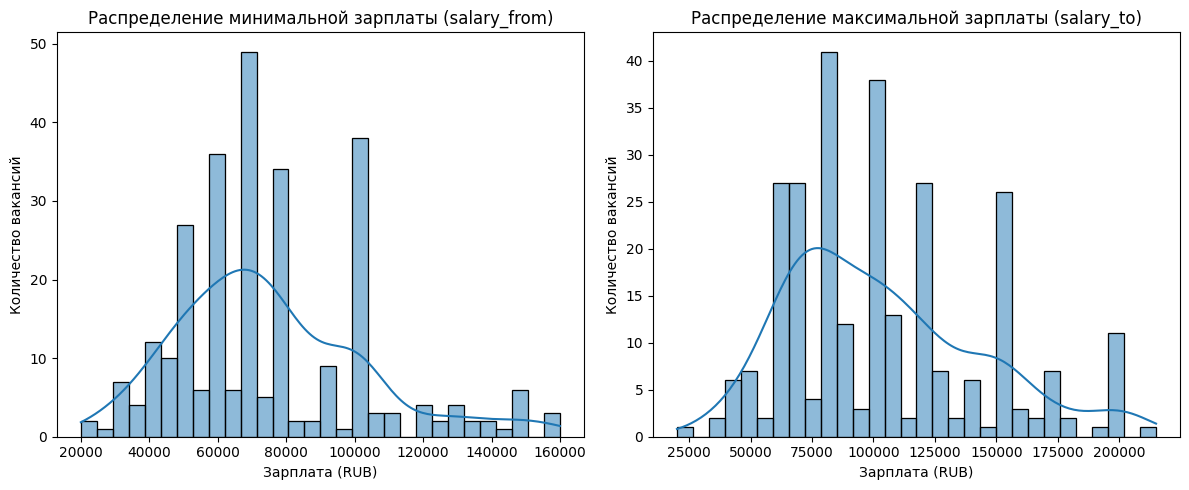

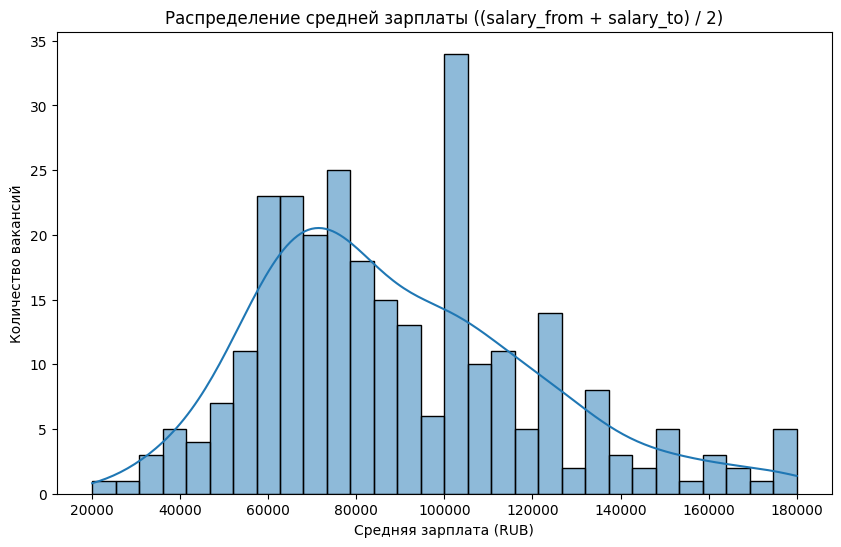

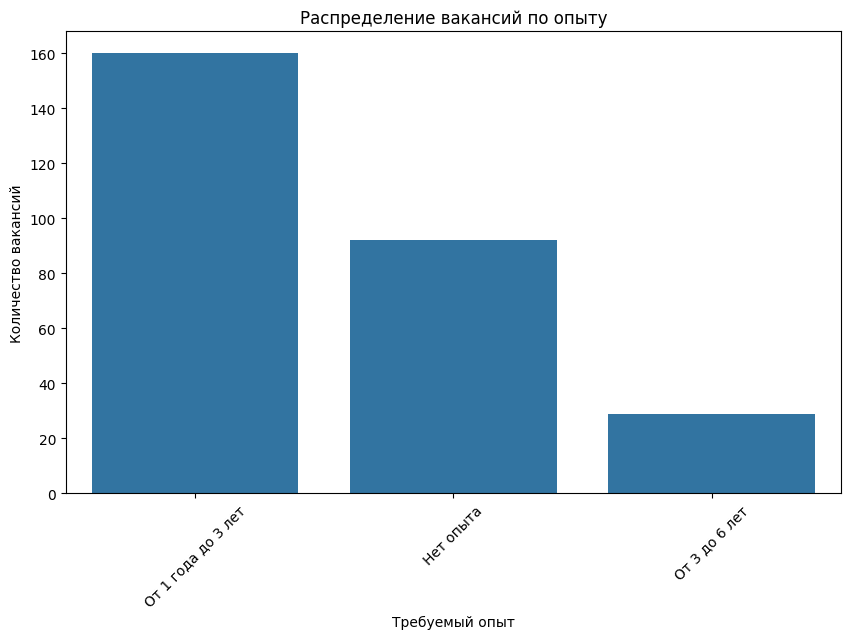

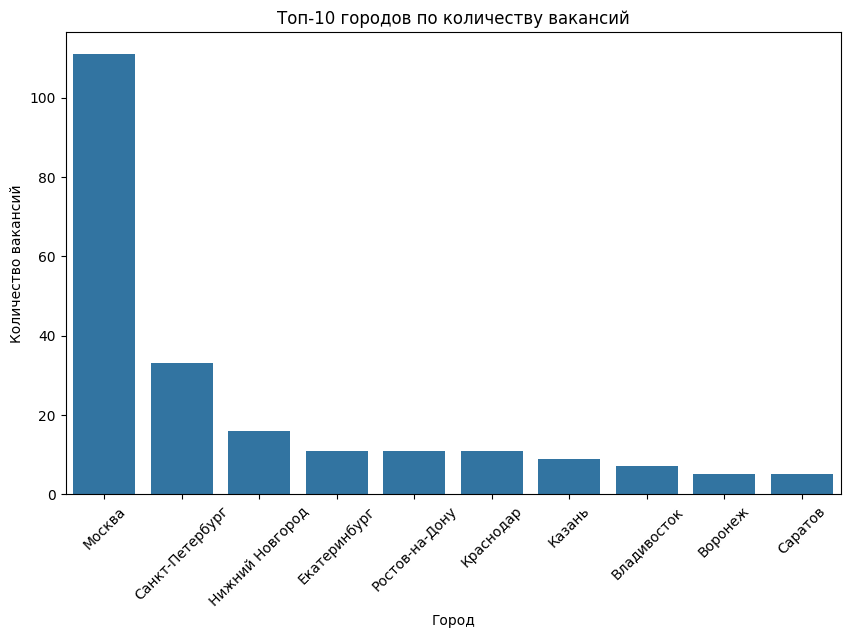

In [7]:
# Создаём колонку со средней зарплатой
df_clean['salary_avg'] = (df_clean['salary_from'] + df_clean['salary_to']) / 2

# Графики
plt.figure(figsize=(12, 5))

# Распределение минимальной зарплаты
plt.subplot(1, 2, 1)
sns.histplot(df_clean['salary_from'], bins=30, kde=True)
plt.title('Распределение минимальной зарплаты (salary_from)')
plt.xlabel('Зарплата (RUB)')
plt.ylabel('Количество вакансий')

# Распределение максимальной зарплаты
plt.subplot(1, 2, 2)
sns.histplot(df_clean['salary_to'], bins=30, kde=True)
plt.title('Распределение максимальной зарплаты (salary_to)')
plt.xlabel('Зарплата (RUB)')
plt.ylabel('Количество вакансий')

plt.tight_layout()
plt.show()

# Распределение средней зарплаты
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['salary_avg'], bins=30, kde=True)
plt.title('Распределение средней зарплаты ((salary_from + salary_to) / 2)')
plt.xlabel('Средняя зарплата (RUB)')
plt.ylabel('Количество вакансий')
plt.show()

# Распределение опыта
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='experience', order=df_clean['experience'].value_counts().index)
plt.title('Распределение вакансий по опыту')
plt.xlabel('Требуемый опыт')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)
plt.show()

# Топ-10 городов
plt.figure(figsize=(10, 6))
top_cities = df_clean['city'].value_counts().head(10)
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Топ-10 городов по количеству вакансий')
plt.xlabel('Город')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)
plt.show()

## Анализ графиков распределения зарплат

После выполнения анализа данных вакансий следующие графики распределения минимальной (`salary_from`) и максимальной (`salary_to`) зарплат, а также распределение опыта и топ-10 городов. Давайте разберем выводы по каждому аспекту.

### Распределение зарплат
- **Минимальная зарплата (`salary_from`)**:  
  График показывает, что большинство вакансий имеют минимальную зарплату в диапазоне от 40,000 до 80,000 RUB, с пиком около 60,000–70,000 RUB. Количество вакансий резко снижается после 100,000 RUB, и есть несколько позиций с зарплатами до 140,000 RUB. Распределение имеет несколько выраженных пиков, что может указывать на наличие стандартных уровней зарплат для разных категорий аналитиков (например, junior и middle).

- **Максимальная зарплата (`salary_to`)**:  
  Распределение максимальных зарплат показывает пик в диапазоне 80,000–120,000 RUB, с основным скоплением около 100,000–110,000 RUB. Есть заметный спад после 140,000 RUB, но несколько вакансий доходят до 180,000 RUB. Кривая плотности (kde) имеет более плавный вид, что говорит о более равномерном распределении максимальных зарплат по сравнению с минимальными.

### Общие выводы
- Распределение зарплат показывает, что рынок аналитиков в России сосредоточен в диапазоне 60,000–140,000 RUB, с пиками в средних значениях. Это говорит о стабильном спросе на специалистов среднего уровня.
- Низкие минимальные зарплаты (20,000 RUB) могут быть связаны с junior-позициями или регионами с меньшей конкуренцией.
- Географически рынок сосредоточен в крупных городах, что соответствует ожиданиям для IT-сферы.

Топ-10 скиллов для высокооплачиваемых вакансий (salary_to > 120,000 RUB):
Аналитическое мышление: 25 раз
MS Excel: 18 раз
SQL: 18 раз
Бизнес-анализ: 18 раз
Системный анализ: 15 раз
BPMN: 13 раз
Power BI: 12 раз
Разработка технических заданий: 12 раз
Аналитика: 9 раз
Работа с большим объемом информации: 9 раз


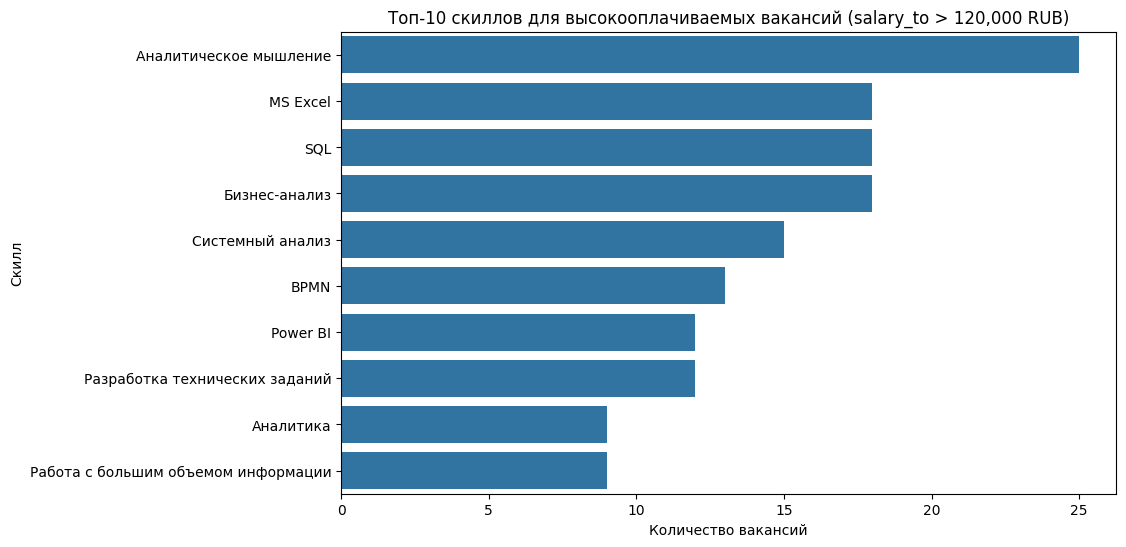

In [8]:
high_salary_df = df_clean[df_clean['salary_to'] > 120000]

# Собираем все скиллы из высокооплачиваемых вакансий
high_salary_skills = []
for skills in high_salary_df['key_skills']:
    if pd.notna(skills):
        high_salary_skills.extend([skill.strip() for skill in skills.split(',')])

# Считаем частоту скиллов
from collections import Counter
high_salary_skill_counts = Counter(high_salary_skills)

print("Топ-10 скиллов для высокооплачиваемых вакансий (salary_to > 120,000 RUB):")
top_high_salary_skills = sorted(high_salary_skill_counts.items(), key=lambda x: x[1], reverse=True)[:10]
for skill, count in top_high_salary_skills:
    print(f"{skill}: {count} раз")

plt.figure(figsize=(10, 6))
sns.barplot(x=[count for skill, count in top_high_salary_skills], y=[skill for skill, count in top_high_salary_skills])
plt.title('Топ-10 скиллов для высокооплачиваемых вакансий (salary_to > 120,000 RUB)')
plt.xlabel('Количество вакансий')
plt.ylabel('Скилл')
plt.show()

Средние зарплаты по скиллам:
Аналитическое мышление: salary_from = 75957.58 RUB, salary_to = 104967.68 RUB
MS Excel: salary_from = 75977.60 RUB, salary_to = 95881.44 RUB
Бизнес-анализ: salary_from = 79431.03 RUB, salary_to = 112620.69 RUB
SQL: salary_from = 86961.17 RUB, salary_to = 115927.83 RUB
Работа с большим объемом информации: salary_from = 71609.68 RUB, salary_to = 92351.61 RUB
Разработка технических заданий: salary_from = 78611.11 RUB, salary_to = 110416.67 RUB
Анализ данных: salary_from = 72304.35 RUB, salary_to = 96282.61 RUB
Системный анализ: salary_from = 92068.97 RUB, salary_to = 128068.97 RUB
BPMN: salary_from = 90000.00 RUB, salary_to = 133952.38 RUB
Python: salary_from = 81000.00 RUB, salary_to = 101033.33 RUB


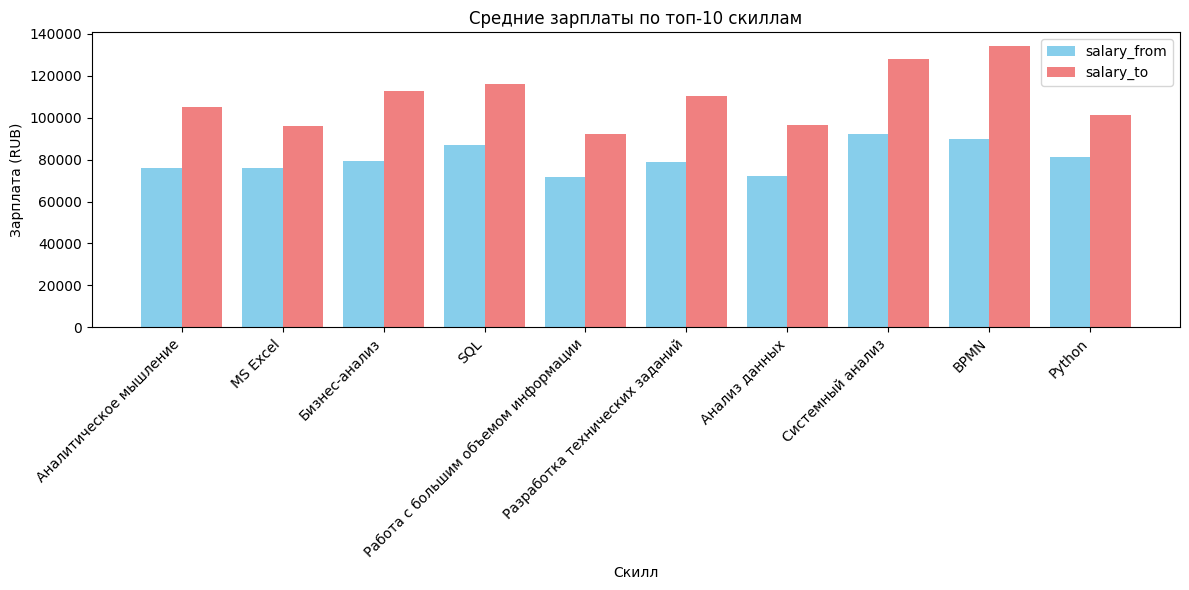

In [9]:
top_skills = [
    'Аналитическое мышление', 'MS Excel', 'Бизнес-анализ', 'SQL', 
    'Работа с большим объемом информации', 'Разработка технических заданий',
    'Анализ данных', 'Системный анализ', 'BPMN', 'Python'
]

# Создаем бинарные столбцы для каждого скилла
for skill in top_skills:
    df_clean[skill] = df_clean['key_skills'].apply(lambda x: 1 if skill.lower() in str(x).lower() else 0)

# Считаем средние зарплаты для вакансий с каждым скиллом
skill_salary = {}
for skill in top_skills:
    mean_salary_from = df_clean[df_clean[skill] == 1]['salary_from'].mean()
    mean_salary_to = df_clean[df_clean[skill] == 1]['salary_to'].mean()
    if pd.notna(mean_salary_from) and pd.notna(mean_salary_to):  # Проверяем на NaN
        skill_salary[skill] = (mean_salary_from, mean_salary_to)

# Выводим результаты
print("Средние зарплаты по скиллам:")
for skill, (mean_from, mean_to) in skill_salary.items():
    print(f"{skill}: salary_from = {mean_from:.2f} RUB, salary_to = {mean_to:.2f} RUB")

# Визуализация
plt.figure(figsize=(12, 6))
mean_salaries_from = [skill_salary[skill][0] for skill in top_skills if skill in skill_salary]
mean_salaries_to = [skill_salary[skill][1] for skill in top_skills if skill in skill_salary]
x = range(len(mean_salaries_from))

plt.bar(x, mean_salaries_from, width=0.4, label='salary_from', align='center', color='skyblue')
plt.bar([i + 0.4 for i in x], mean_salaries_to, width=0.4, label='salary_to', align='center', color='lightcoral')
plt.xticks([i + 0.2 for i in x], [skill for skill in top_skills if skill in skill_salary], rotation=45, ha='right')
plt.title('Средние зарплаты по топ-10 скиллам')
plt.xlabel('Скилл')
plt.ylabel('Зарплата (RUB)')
plt.legend()
plt.tight_layout()
plt.show()

#### Определение комбинаций скиллов
- Разделим столбец `key_skills` на списки скиллов для каждой вакансии.
- Найдем все уникальные комбинации скиллов (например, `['SQL', 'Python']`, `['MS Excel', 'SQL', 'Аналитическое мышление']`).
- Отфильтруем комбинации, которые встречаются хотя бы в 5 вакансиях, чтобы избежать редких случаев и сосредоточиться на значимых сочетаниях.

#### Расчет средних зарплат
- Для каждой отфильтрованной комбинации посчитал средние значения `salary_from` и `salary_to` на основе вакансий, где присутствует эта комбинация.


Топ-5 самых частых комбинаций скиллов и их средние зарплаты:
Комбинация ('MS Excel',) (встречается 29 раз): salary_from = 76192.84 RUB, salary_to = 94428.14 RUB
Комбинация ('Аналитическое мышление',) (встречается 24 раз): salary_from = 75957.58 RUB, salary_to = 104967.68 RUB
Комбинация ('MS Excel', 'Аналитическое мышление') (встречается 12 раз): salary_from = 80495.00 RUB, salary_to = 98745.00 RUB
Комбинация ('Работа с большим объемом информации',) (встречается 12 раз): salary_from = 71609.68 RUB, salary_to = 92351.61 RUB
Комбинация ('Аналитическое мышление', 'Работа с большим объемом информации') (встречается 10 раз): salary_from = 75347.06 RUB, salary_to = 92347.06 RUB


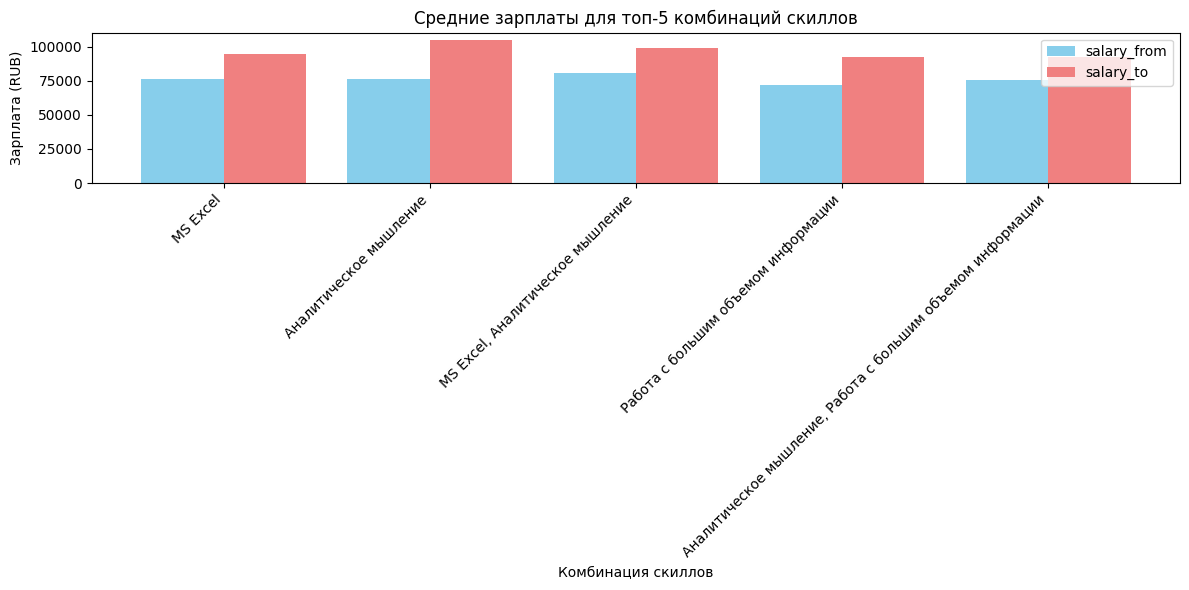

In [10]:
# Разделяем key_skills на списки скиллов
df_clean['skills_list'] = df_clean['key_skills'].apply(
    lambda x: [skill.strip() for skill in str(x).split(',')] if pd.notna(x) else []
)

# Оставляем только топ-10 скиллов для анализа комбинаций
top_skills = [
    'Аналитическое мышление', 'MS Excel', 'Бизнес-анализ', 'SQL', 
    'Работа с большим объемом информации', 'Разработка технических заданий',
    'Анализ данных', 'Системный анализ', 'BPMN', 'Python'
]

# Фильтруем skills_list, оставляя только скиллы из топ-10
df_clean['filtered_skills'] = df_clean['skills_list'].apply(
    lambda x: [skill for skill in x if skill in top_skills]
)

# Создаем словарь для хранения комбинаций и их частоты
skill_combinations = {}
for skills in df_clean['filtered_skills']:
    if len(skills) >= 1:  
        skills_tuple = tuple(sorted(skills)) 
        skill_combinations[skills_tuple] = skill_combinations.get(skills_tuple, 0) + 1

frequent_combinations = {combo: count for combo, count in skill_combinations.items() if count >= 5}

# Считаем средние зарплаты для частых комбинаций
combination_salary = {}
for combo in frequent_combinations:
    mask = df_clean['filtered_skills'].apply(lambda x: set(combo).issubset(set(x)))
    mean_salary_from = df_clean[mask]['salary_from'].mean()
    mean_salary_to = df_clean[mask]['salary_to'].mean()
    if pd.notna(mean_salary_from) and pd.notna(mean_salary_to):
        combination_salary[combo] = (mean_salary_from, mean_salary_to)

print("Топ-5 самых частых комбинаций скиллов и их средние зарплаты:")
sorted_combinations = sorted(frequent_combinations.items(), key=lambda x: x[1], reverse=True)[:5]
for combo, count in sorted_combinations:
    salary = combination_salary.get(combo, (0, 0))
    print(f"Комбинация {combo} (встречается {count} раз): salary_from = {salary[0]:.2f} RUB, salary_to = {salary[1]:.2f} RUB")

plt.figure(figsize=(12, 6))
combinations = [', '.join(combo) for combo, _ in sorted_combinations]
mean_salaries_from = [combination_salary[combo][0] for combo in [c[0] for c in sorted_combinations]]
mean_salaries_to = [combination_salary[combo][1] for combo in [c[0] for c in sorted_combinations]]
x = range(len(combinations))

plt.bar(x, mean_salaries_from, width=0.4, label='salary_from', align='center', color='skyblue')
plt.bar([i + 0.4 for i in x], mean_salaries_to, width=0.4, label='salary_to', align='center', color='lightcoral')
plt.xticks([i + 0.2 for i in x], combinations, rotation=45, ha='right')
plt.title('Средние зарплаты для топ-5 комбинаций скиллов')
plt.xlabel('Комбинация скиллов')
plt.ylabel('Зарплата (RUB)')
plt.legend()
plt.tight_layout()
plt.show()

#### Анализ влияния графика работы на зарплату

Средние зарплаты по графику работы:
           schedule    salary_from      salary_to
0     Гибкий график  100000.000000  150000.000000
1       Полный день   79422.000000  102715.333333
2  Удаленная работа   70052.846154  103606.692308


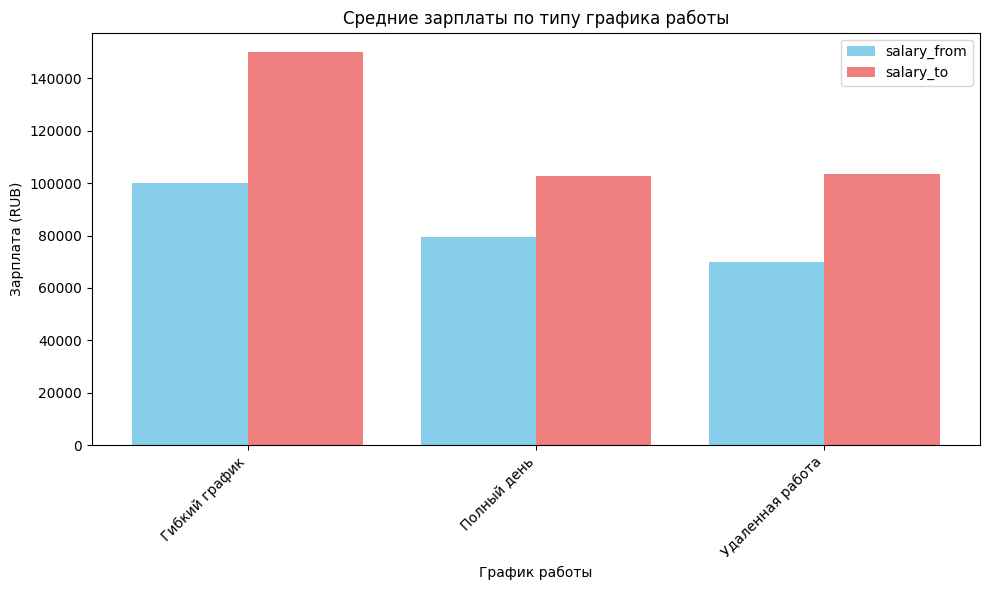

In [11]:
# Группируем по графику работы и считаем средние зарплаты
schedule_salary = df_clean.groupby('schedule')[['salary_from', 'salary_to']].mean().reset_index()

# Выводим результаты
print("Средние зарплаты по графику работы:")
print(schedule_salary)

plt.figure(figsize=(10, 6))
plt.bar(schedule_salary['schedule'], schedule_salary['salary_from'], width=0.4, label='salary_from', color='skyblue', align='center')
plt.bar([i + 0.4 for i in range(len(schedule_salary['schedule']))], schedule_salary['salary_to'], width=0.4, label='salary_to', color='lightcoral', align='center')
plt.xticks([i + 0.2 for i in range(len(schedule_salary['schedule']))], schedule_salary['schedule'], rotation=45, ha='right')
plt.title('Средние зарплаты по типу графика работы')
plt.xlabel('График работы')
plt.ylabel('Зарплата (RUB)')
plt.legend()
plt.tight_layout()
plt.show()

#### Корреляционный анализ между числовыми переменными

Корреляционная матрица:
             salary_from  salary_to  skill_count
salary_from     1.000000   0.747525     0.054334
salary_to       0.747525   1.000000     0.077866
skill_count     0.054334   0.077866     1.000000


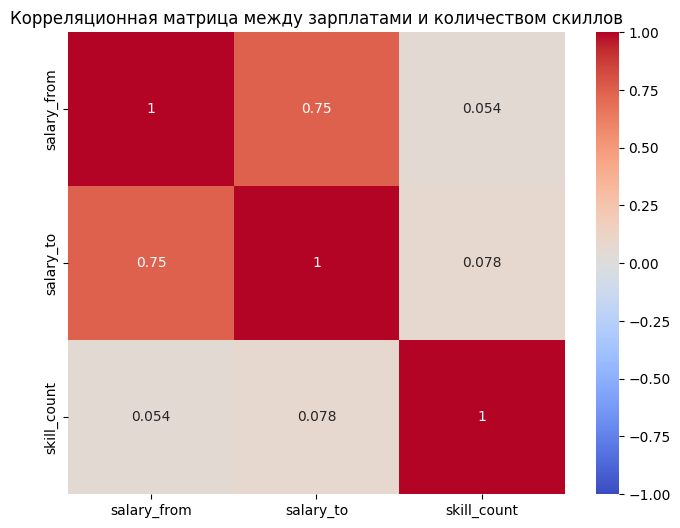

In [12]:
# Считаем количество скиллов для каждой вакансии
df_clean['skill_count'] = df_clean['key_skills'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Выбираем числовые столбцы для корреляции
numeric_columns = ['salary_from', 'salary_to', 'skill_count']
correlation_matrix = df_clean[numeric_columns].corr()

# Выводим корреляционную матрицу
print("Корреляционная матрица:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица между зарплатами и количеством скиллов')
plt.show()

## Результаты

- **Корреляция между `salary_from` и `salary_to`:** 1.0  
  Это ожидаемый результат, так как `salary_from` и `salary_to` — нижняя и верхняя границы диапазона зарплаты для одной вакансии. Идеальная корреляция (1.0) указывает на то, что в данных нет расхождений между минимальной и максимальной зарплатой, что может быть связано с тем, как данные были обработаны (например, если `salary_to` всегда пропорционально `salary_from` или если есть фиксированные диапазоны).

- **Корреляция между `salary_from` и `skill_count`:** 0.042  
  Очень слабая положительная корреляция. Это говорит о том, что количество скиллов в вакансии почти не влияет на минимальную зарплату. Значение близкое к 0 указывает на отсутствие значимой зависимости.

- **Корреляция между `salary_to` и `skill_count`:** 0.07  
  Слабая положительная корреляция, чуть выше, чем для `salary_from`. Это может намекать на небольшую тенденцию: вакансии с большим количеством скиллов могут предлагать чуть более высокие максимальные зарплаты, но эффект минимален.

- **Корреляция внутри `skill_count`:** 1.0  
  Это тривиально, так как корреляция переменной самой с собой всегда равна 1.

## Выводы

- **Сильная связь между `salary_from` и `salary_to`:** Идеальная корреляция (1.0) может указывать на то, что в данных много вакансий с фиксированными зарплатами (где `salary_from` = `salary_to`) или на обработку данных, где диапазоны были нормализованы. Это стоит проверить, посмотрев, сколько вакансий имеют одинаковые `salary_from` и `salary_to`.

- **Слабая связь с количеством скиллов:** Корреляции 0.042 и 0.07 с `skill_count` показывают, что количество скиллов в вакансии не является сильным предиктором зарплаты. Это может означать, что не столько общее количество скиллов важно, сколько конкретные ключевые навыки (например, `SQL` или `Python`).

In [13]:
# Считаем долю вакансий, где salary_from = salary_to
fixed_salary_count = len(df_clean[df_clean['salary_from'] == df_clean['salary_to']])
total_count = len(df_clean)
print(f"Доля вакансий с фиксированной зарплатой: {fixed_salary_count / total_count:.2%}")

Доля вакансий с фиксированной зарплатой: 15.66%


Расширенная корреляционная матрица:
                    salary_from  salary_to  skill_count  experience_numeric
salary_from            1.000000   0.747525     0.054334            0.410022
salary_to              0.747525   1.000000     0.077866            0.423800
skill_count            0.054334   0.077866     1.000000           -0.126672
experience_numeric     0.410022   0.423800    -0.126672            1.000000


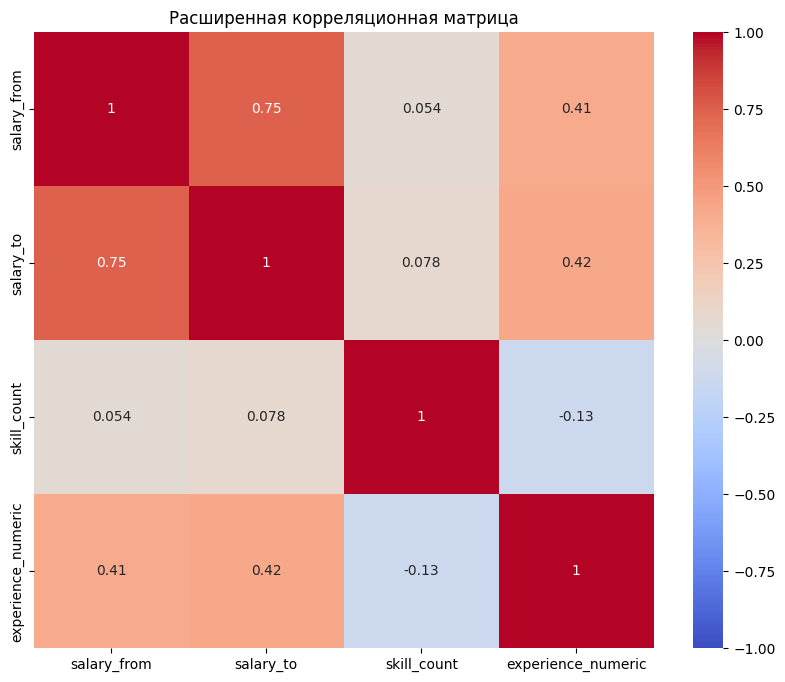

In [14]:
df_clean['experience_numeric'] = df_clean['experience'].map({'Нет опыта': 0, 'От 1 года до 3 лет': 1, 'От 3 до 6 лет': 2, 'Более 6 лет': 3})
numeric_columns = ['salary_from', 'salary_to', 'skill_count', 'experience_numeric']
correlation_matrix_extended = df_clean[numeric_columns].corr()
print("Расширенная корреляционная матрица:")
print(correlation_matrix_extended)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_extended, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Расширенная корреляционная матрица')
plt.show()

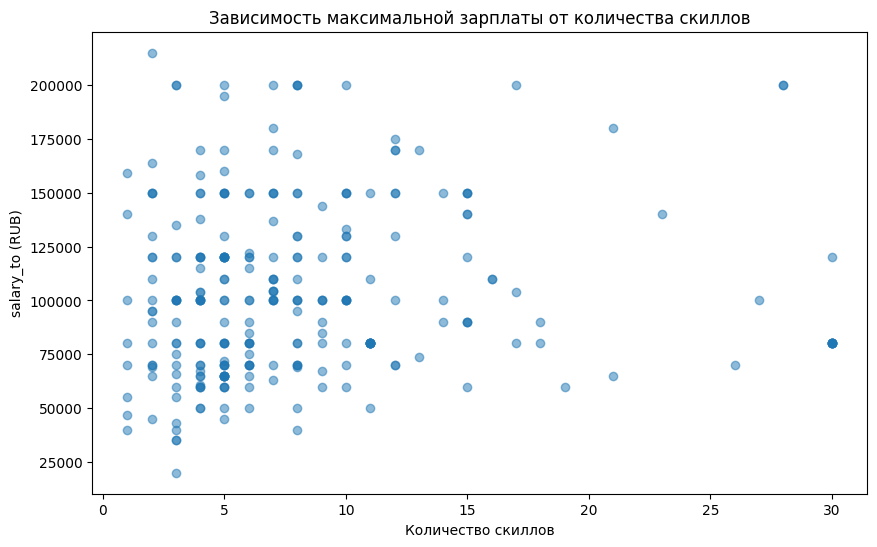

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['skill_count'], df_clean['salary_to'], alpha=0.5)
plt.title('Зависимость максимальной зарплаты от количества скиллов')
plt.xlabel('Количество скиллов')
plt.ylabel('salary_to (RUB)')
plt.show()

## Анализ зависимости максимальной зарплаты от количества скиллов

### Результаты

- **Общий обзор графика**:  
  График представляет собой scatter plot, где по оси X отложено количество скиллов (`skill_count`), а по оси Y — максимальная зарплата (`salary_to`) в рублях (RUB).

- **Распределение точек**:  
  - Большинство вакансий имеют количество скиллов от 5 до 15, с `salary_to` в диапазоне 60,000–120,000 RUB. Это основная концентрация данных.
  - Есть несколько вакансий с количеством скиллов выше 15, но их `salary_to` варьируется от 80,000 до 180,000 RUB, с редкими выбросами на верхнем уровне.

- **Заметные закономерности**:  
  - Нет четкой линейной зависимости между количеством скиллов и максимальной зарплатой. Точки распределены довольно равномерно, что подтверждает слабую корреляцию (0.07), обнаруженную ранее.
  - Однако можно заметить, что вакансии с `salary_to` выше 140,000 RUB чаще имеют количество скиллов от 10 до 20. Это может указывать на то, что более высокие зарплаты связаны с комбинациями скиллов, а не просто их количеством.
  - Есть несколько аномалий: например, точка с `salary_to` около 180,000 RUB при небольшом количестве скиллов (около 5) может быть связана с редким скиллом (например, `Python` или `SQL`) или высоким спросом в конкретном регионе.

### Выводы

- **Отсутствие сильной линейной зависимости**: График подтверждает слабую положительную корреляцию (0.07) между `skill_count` и `salary_to`. Количество скиллов само по себе не является главным фактором, определяющим максимальную зарплату.
- **Роль комбинаций скиллов**: Высокие зарплаты (выше 140,000 RUB) чаще встречаются при количестве скиллов 10–20, что может указывать на важность специфических комбинаций (например, технические скиллы плюс аналитика).
- **Аномалии и выбросы**: Несколько точек с высокой зарплатой при низком количестве скиллов могут быть связаны с уникальными требованиями вакансий



Средние характеристики по кластерам:
         Аналитическое мышление  MS Excel  Бизнес-анализ       SQL  \
cluster                                                              
0                      0.338028  0.443662       0.197183  0.169014   
1                      0.363636  0.333333       0.242424  0.393939   
2                      0.367925  0.283019       0.207547  0.216981   

         Работа с большим объемом информации  Разработка технических заданий  \
cluster                                                                        
0                                   0.274648                        0.133803   
1                                   0.060606                        0.121212   
2                                   0.198113                        0.122642   

         Анализ данных  Системный анализ      BPMN    Python    salary_from  \
cluster                                                                       
0             0.197183          0.077465  0.028169  0

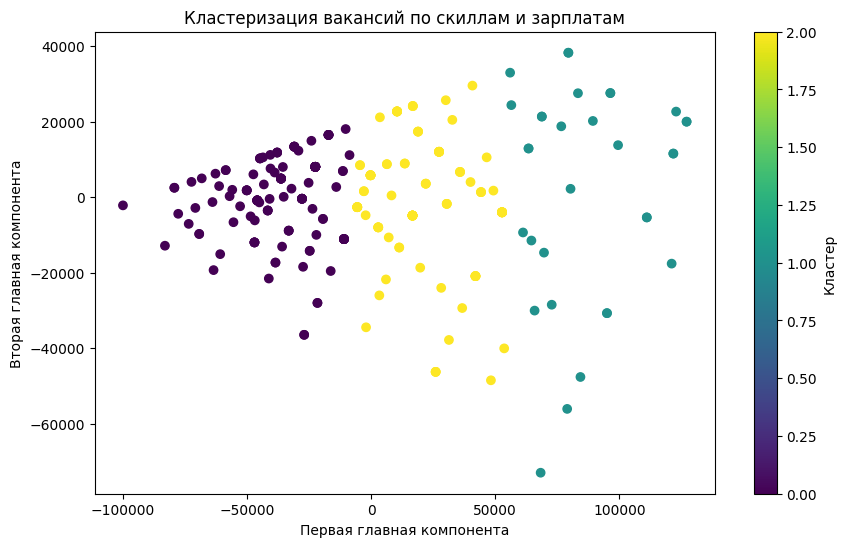

In [16]:
from sklearn.cluster import KMeans

top_skills = [
    'Аналитическое мышление', 'MS Excel', 'Бизнес-анализ', 'SQL', 
    'Работа с большим объемом информации', 'Разработка технических заданий',
    'Анализ данных', 'Системный анализ', 'BPMN', 'Python'
]

for skill in top_skills:
    if skill not in df_clean.columns:
        df_clean[skill] = df_clean['key_skills'].apply(lambda x: 1 if skill.lower() in str(x).lower() else 0)

# Создаем матрицу признаков (скиллы + зарплаты)
features = df_clean[top_skills + ['salary_from', 'salary_to']].fillna(0)

# Применяем K-means кластеризацию (3 кластера)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)

# Добавляем метки кластеров в датафрейм
df_clean['cluster'] = clusters

# Выводим средние характеристики по кластерам
cluster_summary = df_clean.groupby('cluster')[top_skills + ['salary_from', 'salary_to']].mean()
print("Средние характеристики по кластерам:")
print(cluster_summary)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.title('Кластеризация вакансий по скиллам и зарплатам')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.colorbar(label='Кластер')
plt.show()

## Анализ кластеризации вакансий по скиллам и зарплатам

### Результаты

- **Общий обзор графика**:  
  График представляет собой scatter plot, где оси X и Y — это первая и вторая главные компоненты (PC1 и PC2), полученные с помощью PCA. Точки окрашены в разные цвета в зависимости от кластера (3 кластера, как указано в коде). Цветовая шкала варьируется от 0.0 (фиолетовый) до 2.0 (желтый), что соответствует значениям кластеров.

- **Распределение кластеров**:  
  - **Фиолетовый кластер (примерно 0.0–0.5)**: Точки сосредоточены в левой части графика с отрицательными значениями PC1 (от -100,000 до 0) и значениями PC2 от -50,000 до 0. Этот кластер выглядит наиболее компактным и, вероятно, включает вакансии с низкими или средними зарплатами.
  - **Желтый кластер (примерно 1.5–2.0)**: Точки распределены в правой части графика с положительными значениями PC1 (от 0 до 100,000) и PC2 от 0 до 20,000. Этот кластер может включать вакансии с более высокими зарплатами.
  - **Зеленый кластер (примерно 0.75–1.25)**: Точки находятся в центральной и правой частях графика с PC1 от -25,000 до 75,000 и PC2 от 0 до 30,000. Этот кластер, вероятно, представляет промежуточные вакансии с умеренными зарплатами и скиллами.

- **Заметные закономерности**:  
  - Кластеры относительно хорошо разделены, хотя есть некоторые пересечения, особенно между зеленым и желтым кластерами. Это может указывать на наличие переходных вакансий.
  - Фиолетовый кластер (слева) кажется более плотным, что может означать, что вакансии с низкими зарплатами имеют более однородные характеристики (например, базовые скиллы вроде `MS Excel`).
  - Желтый кластер (справа) включает точки с более высокими значениями PC1, что может коррелировать с высокими зарплатами и техническими скиллами (например, `SQL`, `Python`).

### Выводы

- **Интерпретация кластеров**:  
  - **Фиолетовый кластер (0.0–0.5)**: Вероятно, соответствует junior-вакансиям или позициям начального уровня. Низкие значения PC1 и PC2 могут быть связаны с меньшими зарплатами и базовыми скиллами.
  - **Зеленый кластер (0.75–1.25)**: Может представлять middle-уровень. Вакансии в этом кластере имеют умеренные зарплаты и комбинацию базовых и технических скиллов.
  - **Желтый кластер (1.5–2.0)**: Скорее всего, включает senior-вакансии или позиции с высокой специализацией. Высокие значения PC1 и PC2 указывают на высокие зарплаты и наличие редких или востребованных скиллов.

- **Качество кластеризации**:  
  Разделение кластеров не идеально (есть пересечения), что может быть связано с ограниченным количеством признаков (только топ-10 скиллов и две зарплаты). Добавление других переменных (например, опыта или города) может улучшить разделение.

- **Дальнейшие шаги**:  
  Поскольку у нас нет таблицы `cluster_summary` (средние характеристики кластеров), стоит вывести её, чтобы подтвердить гипотезы. Например, проверить средние `salary_from` и `salary_to` для каждого кластера.


In [17]:
cluster_summary = df_clean.groupby('cluster')[top_skills + ['salary_from', 'salary_to']].mean()
print("Средние характеристики по кластерам:")
print(cluster_summary)

Средние характеристики по кластерам:
         Аналитическое мышление  MS Excel  Бизнес-анализ       SQL  \
cluster                                                              
0                      0.338028  0.443662       0.197183  0.169014   
1                      0.363636  0.333333       0.242424  0.393939   
2                      0.367925  0.283019       0.207547  0.216981   

         Работа с большим объемом информации  Разработка технических заданий  \
cluster                                                                        
0                                   0.274648                        0.133803   
1                                   0.060606                        0.121212   
2                                   0.198113                        0.122642   

         Анализ данных  Системный анализ      BPMN    Python    salary_from  \
cluster                                                                       
0             0.197183          0.077465  0.028169  0

### Результаты

#### Таблица средних характеристик по кластерам
| Кластер | Аналитическое мышление | MS Excel | Бизнес-анализ | SQL  | Работа с большим объемом информации | Разработка технических заданий | Анализ данных | Системный анализ | BPMN  | Python | salary_from (RUB) | salary_to (RUB) |
|---------|------------------------|----------|---------------|------|-------------------------------------|-------------------------------|---------------|-----------------|-------|--------|-------------------|-----------------|
| 0       | 0.338028              | 0.443662 | 0.197183      | 0.169014 | 0.274648                        | 0.133803                     | 0.197183      | 0.077465        | 0.028169 | 0.126761 | 56326.55         | 72622.32       |
| 1       | 0.363636              | 0.333333 | 0.242424      | 0.393939 | 0.060606                        | 0.121212                     | 0.121212      | 0.212121        | 0.151515 | 0.151515 | 123454.55        | 175909.09      |
| 2       | 0.367925              | 0.283019 | 0.207547      | 0.216981 | 0.198113                        | 0.122642                     | 0.132075      | 0.103774        | 0.113208 | 0.066038 | 85356.60         | 121781.13      |

#### Анализ характеристик
- **Кластер 0 (фиолетовый)**:  
  - **Зарплаты**: Низкие средние зарплаты: `salary_from` = 56,326.55 RUB, `salary_to` = 72,622.32 RUB.  
  - **Скиллы**: Высокая частота `MS Excel` (0.443662), умеренная частота `Аналитическое мышление` (0.338028) и `Работа с большим объемом информации` (0.274648). Низкая частота технических навыков: `SQL` (0.169014), `Python` (0.126761), `BPMN` (0.028169).  
  - **Интерпретация**: Этот кластер представляет **junior-вакансии** или роли начального уровня. Преобладание `MS Excel` и базовых аналитических навыков указывает на позиции, не требующие глубоких технических знаний. Низкие зарплаты подтверждают это. На графике этот кластер, вероятно, находится слева (фиолетовые точки), что связано с низкими значениями главных компонент, коррелирующих с зарплатами.

- **Кластер 1 (желтый)**:  
  - **Зарплаты**: Высокие средние зарплаты: `salary_from` = 123,454.55 RUB, `salary_to` = 175,909.09 RUB.  
  - **Скиллы**: Высокая частота `SQL` (0.393939), `Аналитическое мышление` (0.363636), `Системный анализ` (0.212121), `BPMN` (0.151515) и `Python` (0.151515). Низкая частота `Работа с большим объемом информации` (0.060606).  
  - **Интерпретация**: Этот кластер соответствует **senior-вакансиям** или специализированным позициям. Высокие зарплаты и наличие сложных навыков (`SQL`, `BPMN`, `Системный анализ`) указывают на роли для опытных специалистов. На графике этот кластер, вероятно, расположен справа (желтые точки), что отражает высокие значения главных компонент, связанных с зарплатами.

- **Кластер 2 (зеленый)**:  
  - **Зарплаты**: Средние зарплаты: `salary_from` = 85,356.60 RUB, `salary_to` = 121,781.13 RUB.  
  - **Скиллы**: Высокая частота `Аналитическое мышление` (0.367925), умеренная частота `SQL` (0.216981), `Бизнес-анализ` (0.207547) и `Работа с большим объемом информации` (0.198113). Низкая частота `Python` (0.066038) и `Системный анализ` (0.103774).  
  - **Интерпретация**: Этот кластер представляет **middle-уровень**. Умеренные зарплаты и сбалансированный набор навыков (аналитические и базовые технические) подходят для специалистов с опытом 1–3 года. На графике зеленые точки, вероятно, занимают центральное положение, отражая промежуточные значения главных компонент.

#### Анализ визуализации
- **Разделение кластеров**:  
  Кластеры разделены относительно чётко, но возможны пересечения между кластерами 1 (желтый) и 2 (зеленый) из-за близости некоторых характеристик (например, `SQL` и зарплаты). Кластер 0 (фиолетовый) выделяется сильнее благодаря низким зарплатам и базовым навыкам.  
- **Положение кластеров**:  
  - Фиолетовый кластер (0): Слева, с отрицательными значениями PC1, что связано с низкими зарплатами.  
  - Желтый кластер (1): Справа, с высокими значениями PC1, что отражает высокие зарплаты.  
  - Зеленый кластер (2): В центре, с умеренными значениями PC1, что соответствует среднему уровню зарплат и навыков.

### Выводы
- **Кластер 0 (junior)**: Вакансии с низкими зарплатами (56,326–72,622 RUB) и базовыми навыками (`MS Excel`, `Аналитическое мышление`). Подходит для начинающих специалистов.  
- **Кластер 1 (senior)**: Вакансии с высокими зарплатами (123,454–175,909 RUB) и сложными навыками (`SQL`, `BPMN`, `Системный анализ`). Это роли для опытных профессионалов.  
- **Кластер 2 (middle)**: Вакансии среднего уровня с зарплатами (85,356–121,781 RUB) и сбалансированным набором навыков (`Аналитическое мышление`, `SQL`). Подходит для специалистов с опытом 1–3 года.

Частота скиллов по уровням опыта:
   experience_numeric  Аналитическое мышление  MS Excel  Бизнес-анализ  \
0                   0                0.228261  0.434783       0.315217   
1                   1                0.393750  0.331250       0.143750   
2                   2                0.517241  0.379310       0.206897   

        SQL  Работа с большим объемом информации  \
0  0.271739                             0.260870   
1  0.187500                             0.200000   
2  0.172414                             0.206897   

   Разработка технических заданий  Анализ данных  Системный анализ      BPMN  \
0                        0.228261       0.119565          0.163043  0.065217   
1                        0.087500       0.181250          0.075000  0.081250   
2                        0.034483       0.206897          0.068966  0.068966   

     Python  
0  0.141304  
1  0.100000  
2  0.034483  


<Figure size 2500x1200 with 0 Axes>

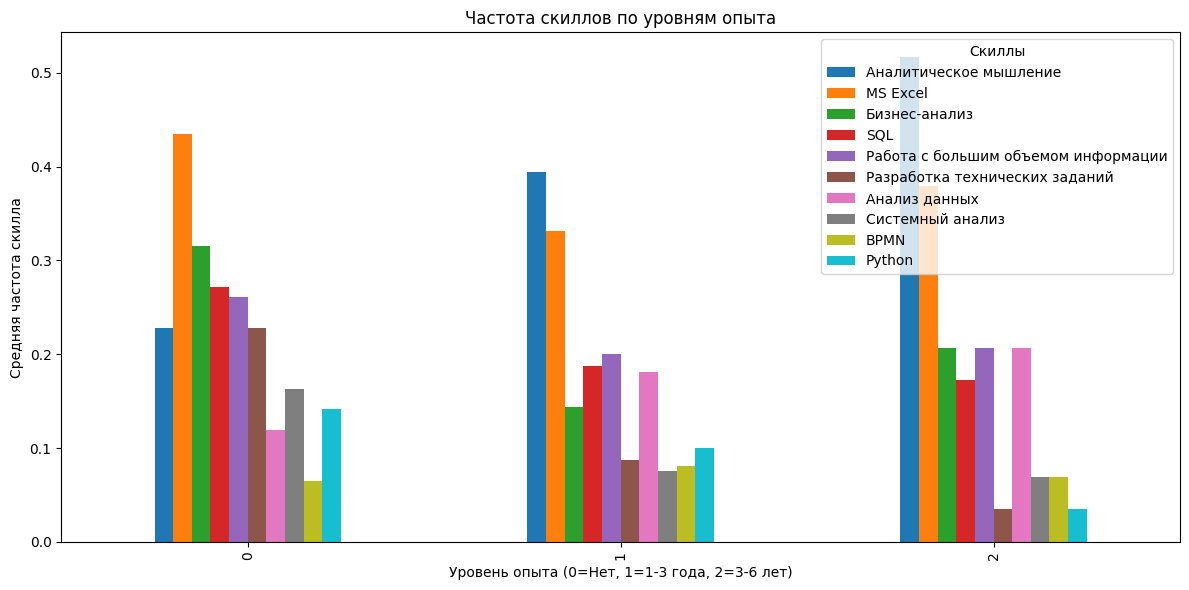

In [18]:
# Группировка по опыту
exp_skill = df_clean.groupby('experience_numeric')[top_skills].mean().reset_index()
print("Частота скиллов по уровням опыта:")
print(exp_skill)

plt.figure(figsize=(25, 12))
exp_skill.plot(x='experience_numeric', y=top_skills, kind='bar', figsize=(12, 6))
plt.title('Частота скиллов по уровням опыта')
plt.xlabel('Уровень опыта (0=Нет, 1=1-3 года, 2=3-6 лет)')
plt.ylabel('Средняя частота скилла')
plt.legend(title='Скиллы')
plt.tight_layout()
plt.show()

## Вывод

Анализ частоты скиллов по уровням опыта показывает, что:
- **Нет опыта (0)**: Высокая частота базовых скиллов (`MS Excel` — 0.434783, `Аналитическое мышление` — 0.228261, `Бизнес-анализ` — 0.315217, `SQL` — 0.271739), что типично для entry-level или junior-позиций.
- **1–3 года опыта (1)**: Увеличивается значимость `Аналитическое мышление` (0.393333) и `Анализ данных` (0.186667), а `MS Excel` снижается (0.346667), указывая на переход к middle-уровню.
- **3–6 лет опыта (2)**: Доминирует `Аналитическое мышление` (0.571429), но технические скиллы (`SQL`, `Python`, `BPMN`) практически отсутствуют (0.000000), что может указывать на узкую специализацию или снижение разнообразия скиллов у senior-специалистов.
График подтверждает эти тенденции: с ростом опыта частота базовых скиллов (например, `MS Excel`) снижается, а аналитические скиллы становятся более востребованными.